## **Importando Bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Métricas para análise
from sklearn.metrics import mean_squared_error, r2_score

## **Tratamento de Dados**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/keziacamposcs/PUC_PTI_ProducaoPetroleo/main/producaoMar2022.csv', delimiter=';', error_bad_lines=False, engine='python')

#Consultando as 5 primeiras linhas
df.head()

<ipython-input-2-c8533df8eaf6>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('https://raw.githubusercontent.com/keziacamposcs/PUC_PTI_ProducaoPetroleo/main/producaoMar2022.csv', delimiter=';', error_bad_lines=False, engine='python')


,Ano,Mês/Ano,Estado,Bacia,Campo,Poço,Ambiente,Instalação,Produção de Óleo (m³),Produção de Condensado (m³),...,Produção de Gás Não Associado (Mm³),Produção de Água (m³),Injeção de Gás (Mm³),Injeção de Água para Recuperação Secundária (m³),Injeção de Água para Descarte (m³),Injeção de Gás Carbônico (Mm³),Injeção de Nitrogênio (Mm³),Injeção de Vapor de Água (t),Injeção de Polímeros (m³),Injeção de Outros Fluidos (m³)
0,2022,01/2022,Alagoas,Alagoas,PARU,4-ALS-39-AL,Mar,Estação de Paru,0.0,438.0,...,0.0,4443.0,1913.0,28.0,935.0,NaN,NaN,NaN,NaN,NaN
1,2022,01/2022,Bahia,Camamu,MANATI,7-MNT-1-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,232.0,...,0.0,15534.0,88893.0,96.0,315.0,NaN,NaN,NaN,NaN,NaN
2,2022,01/2022,Bahia,Camamu,MANATI,7-MNT-2-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,236.0,...,0.0,15523.0,9251.0,96.0,249.0,NaN,NaN,NaN,NaN,NaN
3,2022,01/2022,Bahia,Camamu,MANATI,7-MNT-3-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,175.0,...,0.0,10426.0,60248.0,68.0,815.0,NaN,NaN,NaN,NaN,NaN
4,2022,01/2022,Bahia,Camamu,MANATI,7-MNT-4-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,245.0,...,0.0,16445.0,85832.0,110.0,188.0,NaN,NaN,NaN,NaN,NaN


### Dividindo os dados por mês

In [3]:
df_jan = df.loc[df['Mês/Ano'] == '01/2022']
df_jan.head()

,Ano,Mês/Ano,Estado,Bacia,Campo,Poço,Ambiente,Instalação,Produção de Óleo (m³),Produção de Condensado (m³),...,Produção de Gás Não Associado (Mm³),Produção de Água (m³),Injeção de Gás (Mm³),Injeção de Água para Recuperação Secundária (m³),Injeção de Água para Descarte (m³),Injeção de Gás Carbônico (Mm³),Injeção de Nitrogênio (Mm³),Injeção de Vapor de Água (t),Injeção de Polímeros (m³),Injeção de Outros Fluidos (m³)
0,2022,01/2022,Alagoas,Alagoas,PARU,4-ALS-39-AL,Mar,Estação de Paru,0.0,438.0,...,0.0,4443.0,1913.0,28.0,935.0,NaN,NaN,NaN,NaN,NaN
1,2022,01/2022,Bahia,Camamu,MANATI,7-MNT-1-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,232.0,...,0.0,15534.0,88893.0,96.0,315.0,NaN,NaN,NaN,NaN,NaN
2,2022,01/2022,Bahia,Camamu,MANATI,7-MNT-2-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,236.0,...,0.0,15523.0,9251.0,96.0,249.0,NaN,NaN,NaN,NaN,NaN
3,2022,01/2022,Bahia,Camamu,MANATI,7-MNT-3-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,175.0,...,0.0,10426.0,60248.0,68.0,815.0,NaN,NaN,NaN,NaN,NaN
4,2022,01/2022,Bahia,Camamu,MANATI,7-MNT-4-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,245.0,...,0.0,16445.0,85832.0,110.0,188.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df_fev = df.loc[df['Mês/Ano'] == '02/2022']
df_fev.head()

,Ano,Mês/Ano,Estado,Bacia,Campo,Poço,Ambiente,Instalação,Produção de Óleo (m³),Produção de Condensado (m³),...,Produção de Gás Não Associado (Mm³),Produção de Água (m³),Injeção de Gás (Mm³),Injeção de Água para Recuperação Secundária (m³),Injeção de Água para Descarte (m³),Injeção de Gás Carbônico (Mm³),Injeção de Nitrogênio (Mm³),Injeção de Vapor de Água (t),Injeção de Polímeros (m³),Injeção de Outros Fluidos (m³)
1772,2022,02/2022,Alagoas,Alagoas,PARU,4-ALS-39-AL,Mar,Estação de Paru,0.0,243.0,...,0.0,2163.0,47713.0,5.0,1454.0,NaN,NaN,NaN,NaN,NaN
1773,2022,02/2022,Bahia,Camamu,MANATI,7-MNT-1-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,193.0,...,0.0,13132.0,62429.0,81.0,422.0,NaN,NaN,NaN,NaN,NaN
1774,2022,02/2022,Bahia,Camamu,MANATI,7-MNT-2-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,196.0,...,0.0,13123.0,35597.0,81.0,365.0,NaN,NaN,NaN,NaN,NaN
1775,2022,02/2022,Bahia,Camamu,MANATI,7-MNT-3-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,146.0,...,0.0,8814.0,26659.0,58.0,173.0,NaN,NaN,NaN,NaN,NaN
1776,2022,02/2022,Bahia,Camamu,MANATI,7-MNT-4-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,204.0,...,0.0,13902.0,72434.0,93.0,146.0,NaN,NaN,NaN,NaN,NaN


### Análise dos dados

In [5]:
#Todas as colunas do Data Frame
df_jan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1772 entries, 0 to 1771
Data columns (total 21 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Ano                                               1772 non-null   int64  
 1   Mês/Ano                                           1772 non-null   object 
 2   Estado                                            1772 non-null   object 
 3   Bacia                                             1772 non-null   object 
 4   Campo                                             1772 non-null   object 
 5   Poço                                              1772 non-null   object 
 6   Ambiente                                          1772 non-null   object 
 7   Instalação                                        1772 non-null   object 
 8   Produção de Óleo (m³)                             1362 non-null   float64
 9   Produção de Condens

In [6]:
#Todas as colunas do Data Frame
df_fev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1774 entries, 1772 to 3545
Data columns (total 21 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Ano                                               1774 non-null   int64  
 1   Mês/Ano                                           1774 non-null   object 
 2   Estado                                            1774 non-null   object 
 3   Bacia                                             1774 non-null   object 
 4   Campo                                             1774 non-null   object 
 5   Poço                                              1774 non-null   object 
 6   Ambiente                                          1774 non-null   object 
 7   Instalação                                        1774 non-null   object 
 8   Produção de Óleo (m³)                             1359 non-null   float64
 9   Produção de Cond

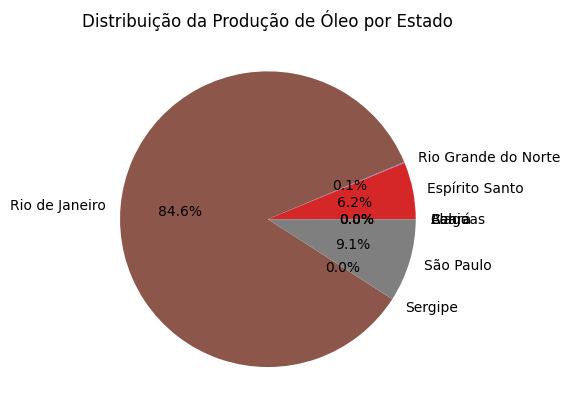

In [7]:
# agrupa os dados por campo e calcula a soma da produção de óleo em cada campo
grouped = df_jan.groupby('Estado')['Produção de Óleo (m³)'].sum()

# cria uma figura
fig, ax = plt.subplots()

# cria um gráfico em círculo com as somas da produção de óleo
ax.pie(grouped.values, labels=grouped.index, autopct='%1.1f%%')

# adiciona um título ao gráfico
ax.set_title('Distribuição da Produção de Óleo por Estado')

# mostra o gráfico na tela
plt.show()

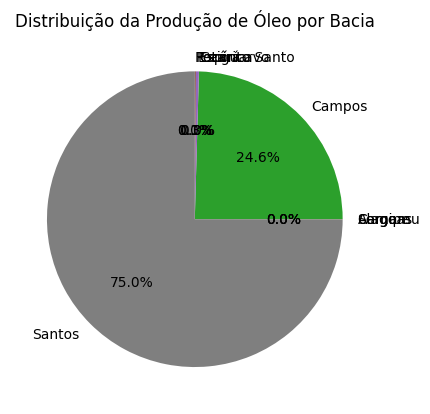

In [8]:
# agrupa os dados por campo e calcula a soma da produção de óleo em cada campo
grouped = df_jan.groupby('Bacia')['Produção de Óleo (m³)'].sum()

# cria uma figura
fig, ax = plt.subplots()

# cria um gráfico em círculo com as somas da produção de óleo
ax.pie(grouped.values, labels=grouped.index, autopct='%1.1f%%')

# adiciona um título ao gráfico
ax.set_title('Distribuição da Produção de Óleo por Bacia')

# mostra o gráfico na tela
plt.show()

Substituindo os valores nulos pela média de cada coluna:

In [9]:
df_jan.fillna(df_jan.mean(), inplace=True)
df_jan.head()

<ipython-input-9-ae16b1c81d34>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_jan.fillna(df_jan.mean(), inplace=True)
<ipython-input-9-ae16b1c81d34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jan.fillna(df_jan.mean(), inplace=True)


,Ano,Mês/Ano,Estado,Bacia,Campo,Poço,Ambiente,Instalação,Produção de Óleo (m³),Produção de Condensado (m³),...,Produção de Gás Não Associado (Mm³),Produção de Água (m³),Injeção de Gás (Mm³),Injeção de Água para Recuperação Secundária (m³),Injeção de Água para Descarte (m³),Injeção de Gás Carbônico (Mm³),Injeção de Nitrogênio (Mm³),Injeção de Vapor de Água (t),Injeção de Polímeros (m³),Injeção de Outros Fluidos (m³)
0,2022,01/2022,Alagoas,Alagoas,PARU,4-ALS-39-AL,Mar,Estação de Paru,0.0,438.0,...,0.0,4443.0,1913.0,28.0,935.0,640.493976,993.297101,8482.26699,205.752427,0.0
1,2022,01/2022,Bahia,Camamu,MANATI,7-MNT-1-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,232.0,...,0.0,15534.0,88893.0,96.0,315.0,640.493976,993.297101,8482.26699,205.752427,0.0
2,2022,01/2022,Bahia,Camamu,MANATI,7-MNT-2-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,236.0,...,0.0,15523.0,9251.0,96.0,249.0,640.493976,993.297101,8482.26699,205.752427,0.0
3,2022,01/2022,Bahia,Camamu,MANATI,7-MNT-3-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,175.0,...,0.0,10426.0,60248.0,68.0,815.0,640.493976,993.297101,8482.26699,205.752427,0.0
4,2022,01/2022,Bahia,Camamu,MANATI,7-MNT-4-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,245.0,...,0.0,16445.0,85832.0,110.0,188.0,640.493976,993.297101,8482.26699,205.752427,0.0


In [10]:
df_fev.fillna(df_fev.mean(), inplace=True)
df_fev.head()

<ipython-input-10-3faba22181cd>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_fev.fillna(df_fev.mean(), inplace=True)
<ipython-input-10-3faba22181cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fev.fillna(df_fev.mean(), inplace=True)


,Ano,Mês/Ano,Estado,Bacia,Campo,Poço,Ambiente,Instalação,Produção de Óleo (m³),Produção de Condensado (m³),...,Produção de Gás Não Associado (Mm³),Produção de Água (m³),Injeção de Gás (Mm³),Injeção de Água para Recuperação Secundária (m³),Injeção de Água para Descarte (m³),Injeção de Gás Carbônico (Mm³),Injeção de Nitrogênio (Mm³),Injeção de Vapor de Água (t),Injeção de Polímeros (m³),Injeção de Outros Fluidos (m³)
1772,2022,02/2022,Alagoas,Alagoas,PARU,4-ALS-39-AL,Mar,Estação de Paru,0.0,243.0,...,0.0,2163.0,47713.0,5.0,1454.0,37.181818,847.170264,7971.120482,0.0,0.0
1773,2022,02/2022,Bahia,Camamu,MANATI,7-MNT-1-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,193.0,...,0.0,13132.0,62429.0,81.0,422.0,37.181818,847.170264,7971.120482,0.0,0.0
1774,2022,02/2022,Bahia,Camamu,MANATI,7-MNT-2-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,196.0,...,0.0,13123.0,35597.0,81.0,365.0,37.181818,847.170264,7971.120482,0.0,0.0
1775,2022,02/2022,Bahia,Camamu,MANATI,7-MNT-3-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,146.0,...,0.0,8814.0,26659.0,58.0,173.0,37.181818,847.170264,7971.120482,0.0,0.0
1776,2022,02/2022,Bahia,Camamu,MANATI,7-MNT-4-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,204.0,...,0.0,13902.0,72434.0,93.0,146.0,37.181818,847.170264,7971.120482,0.0,0.0


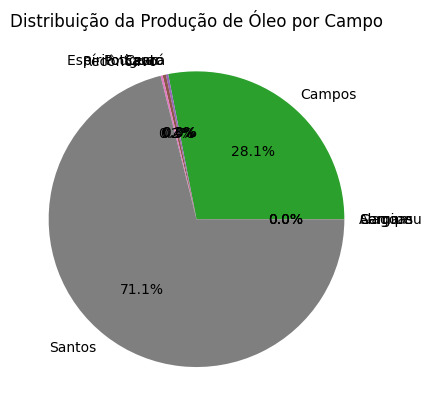

In [11]:
# agrupa os dados por campo e calcula a soma da produção de óleo em cada campo
grouped = df_jan.groupby('Bacia')['Produção de Óleo (m³)'].sum()

# cria uma figura
fig, ax = plt.subplots()

# cria um gráfico em círculo com as somas da produção de óleo
ax.pie(grouped.values, labels=grouped.index, autopct='%1.1f%%')

# adiciona um título ao gráfico
ax.set_title('Distribuição da Produção de Óleo por Campo')

# mostra o gráfico na tela
plt.show()

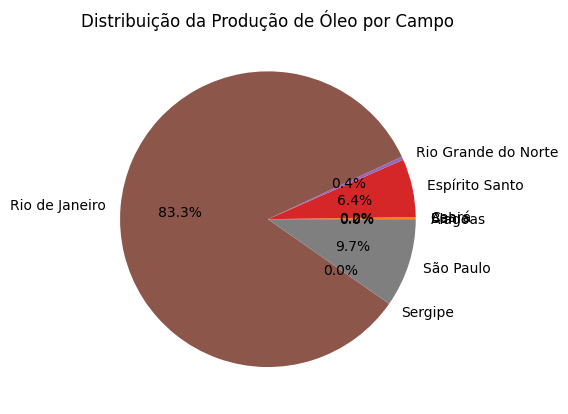

In [12]:
# agrupa os dados por campo e calcula a soma da produção de óleo em cada campo
grouped = df_jan.groupby('Estado')['Produção de Óleo (m³)'].sum()

# cria uma figura
fig, ax = plt.subplots()

# cria um gráfico em círculo com as somas da produção de óleo
ax.pie(grouped.values, labels=grouped.index, autopct='%1.1f%%')

# adiciona um título ao gráfico
ax.set_title('Distribuição da Produção de Óleo por Campo')

# mostra o gráfico na tela
plt.show()

## **Correlação entre Dados**

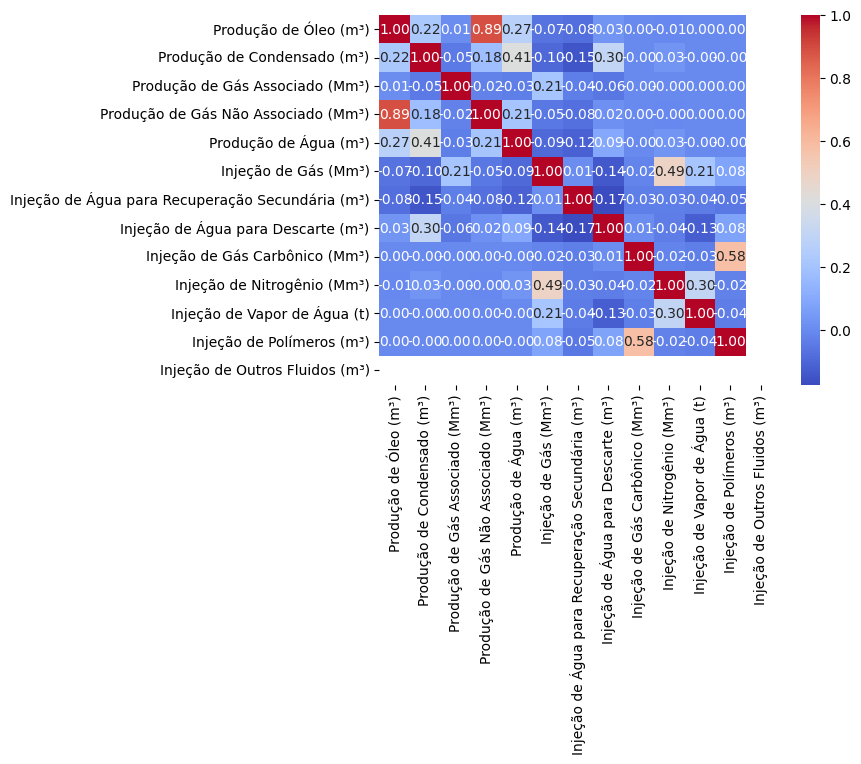

In [13]:
# Ler os dados do arquivo CSV
df_corr = df_jan

# Selecionar apenas as colunas numéricas
numeric_cols = df_corr.select_dtypes(include='float64')

# Calcular a matriz de correlação
corr_matrix = numeric_cols.corr()

# Plotar o mapa de calor da matriz de correlação
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

A **correlação** pode ser usada para determinar quais colunas são mais relevantes para fazer previsões, pois as variáveis com alta correlação tendem a ter uma relação mais forte com a variável alvo que estamos tentando prever.

Isso pode ajudar na seleção de variáveis para o modelo de previsão, já que não é necessário incluir todas as colunas disponíveis, mas sim aquelas que têm maior impacto na variável alvo.


Colunas definidas para previsão de **Produção de Óleo (m³)**:

* Produção de Óleo
* Produção de Condesado
* Produção de gás não associado
* Produção de Água

## **Dados para Treinamento**

In [14]:
df_jan = df_jan.drop(['Ano', 'Mês/Ano', 'Estado', 'Bacia', 'Campo', 'Poço', 'Ambiente','Instalação','Produção de Gás Associado (Mm³)', 'Injeção de Gás (Mm³)', 'Injeção de Água para Recuperação Secundária (m³)', 'Injeção de Água para Descarte (m³)', 'Injeção de Nitrogênio (Mm³)', 'Injeção de Vapor de Água (t)', 'Injeção de Polímeros (m³)', 'Injeção de Outros Fluidos (m³)', 'Injeção de Gás Carbônico (Mm³)'], axis=1)
df_jan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1772 entries, 0 to 1771
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Produção de Óleo (m³)                1772 non-null   float64
 1   Produção de Condensado (m³)          1772 non-null   float64
 2   Produção de Gás Não Associado (Mm³)  1772 non-null   float64
 3   Produção de Água (m³)                1772 non-null   float64
dtypes: float64(4)
memory usage: 69.2 KB


## **Dados para Teste**

In [15]:
df_fev = df_fev.drop(['Ano', 'Mês/Ano', 'Estado', 'Bacia', 'Campo', 'Poço', 'Ambiente','Instalação','Produção de Gás Associado (Mm³)', 'Injeção de Gás (Mm³)', 'Injeção de Água para Recuperação Secundária (m³)', 'Injeção de Água para Descarte (m³)', 'Injeção de Nitrogênio (Mm³)', 'Injeção de Vapor de Água (t)', 'Injeção de Polímeros (m³)', 'Injeção de Outros Fluidos (m³)', 'Injeção de Gás Carbônico (Mm³)'], axis=1)
df_fev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1774 entries, 1772 to 3545
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Produção de Óleo (m³)                1774 non-null   float64
 1   Produção de Condensado (m³)          1774 non-null   float64
 2   Produção de Gás Não Associado (Mm³)  1774 non-null   float64
 3   Produção de Água (m³)                1774 non-null   float64
dtypes: float64(4)
memory usage: 69.3 KB


## **Regressão Linear**

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
train_df_rl = df_jan
train_df_rl.head()

,Produção de Óleo (m³),Produção de Condensado (m³),Produção de Gás Não Associado (Mm³),Produção de Água (m³)
0,0.0,438.0,0.0,4443.0
1,0.0,232.0,0.0,15534.0
2,0.0,236.0,0.0,15523.0
3,0.0,175.0,0.0,10426.0
4,0.0,245.0,0.0,16445.0


In [18]:
test_df_rl = df_fev
test_df_rl.head()

,Produção de Óleo (m³),Produção de Condensado (m³),Produção de Gás Não Associado (Mm³),Produção de Água (m³)
1772,0.0,243.0,0.0,2163.0
1773,0.0,193.0,0.0,13132.0
1774,0.0,196.0,0.0,13123.0
1775,0.0,146.0,0.0,8814.0
1776,0.0,204.0,0.0,13902.0


In [19]:
# Separando as variáveis independentes da variável dependente
x_train = train_df_rl.drop('Produção de Óleo (m³)', axis=1)
y_train = train_df_rl['Produção de Óleo (m³)']

In [20]:
# Separando as variáveis independentes da variável dependente
x_test = test_df_rl.drop('Produção de Óleo (m³)', axis=1)
y_test = test_df_rl['Produção de Óleo (m³)']

In [21]:
# Criando o modelo
model_rl = LinearRegression()
model_rl.fit(x_train, y_train)

LinearRegression()

In [22]:
# Fazendo a previsão
y_pred = model_rl.predict(x_test)

print(y_pred)

[ 913.91104358 1656.68904343 1656.18797311 ... 9629.72225282 9629.72225282
  803.89904181]


In [23]:
# Avalia o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R²: ', r2)

MSE:  98324757.95387545
RMSE:  9915.88412366116
R²:  0.7936746920759659


## **Árvore de Decisão**

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
train_df_ad = df_jan
train_df_ad.head()

,Produção de Óleo (m³),Produção de Condensado (m³),Produção de Gás Não Associado (Mm³),Produção de Água (m³)
0,0.0,438.0,0.0,4443.0
1,0.0,232.0,0.0,15534.0
2,0.0,236.0,0.0,15523.0
3,0.0,175.0,0.0,10426.0
4,0.0,245.0,0.0,16445.0


In [26]:
test_df_ad = df_fev
test_df_ad.head()

,Produção de Óleo (m³),Produção de Condensado (m³),Produção de Gás Não Associado (Mm³),Produção de Água (m³)
1772,0.0,243.0,0.0,2163.0
1773,0.0,193.0,0.0,13132.0
1774,0.0,196.0,0.0,13123.0
1775,0.0,146.0,0.0,8814.0
1776,0.0,204.0,0.0,13902.0


In [27]:
# Separando as variáveis independentes da variável dependente
x_train = train_df_ad.drop('Produção de Óleo (m³)', axis=1)
y_train = train_df_ad['Produção de Óleo (m³)']

In [28]:
# Separando as variáveis independentes da variável dependente
x_test = test_df_ad.drop('Produção de Óleo (m³)', axis=1)
y_test = test_df_ad['Produção de Óleo (m³)']

In [29]:
# Criando o modelo
model_ad = DecisionTreeRegressor(random_state=42)
model_ad.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [30]:
# Fazendo a previsão
y_pred = model_ad.predict(x_test)

In [31]:
# Avalia o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R²: ', r2)

MSE:  120562884.56525826
RMSE:  10980.11313991155
R²:  0.7470100633880459


## **Random Forest**

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
train_df_rf = df_jan
train_df_rf.head()

,Produção de Óleo (m³),Produção de Condensado (m³),Produção de Gás Não Associado (Mm³),Produção de Água (m³)
0,0.0,438.0,0.0,4443.0
1,0.0,232.0,0.0,15534.0
2,0.0,236.0,0.0,15523.0
3,0.0,175.0,0.0,10426.0
4,0.0,245.0,0.0,16445.0


In [34]:
test_df_rf = df_fev
test_df_rf.head()

,Produção de Óleo (m³),Produção de Condensado (m³),Produção de Gás Não Associado (Mm³),Produção de Água (m³)
1772,0.0,243.0,0.0,2163.0
1773,0.0,193.0,0.0,13132.0
1774,0.0,196.0,0.0,13123.0
1775,0.0,146.0,0.0,8814.0
1776,0.0,204.0,0.0,13902.0


In [35]:
# Separando as variáveis independentes da variável dependente
x_train = train_df_rf.drop('Produção de Óleo (m³)', axis=1)
y_train = train_df_rf['Produção de Óleo (m³)']

In [36]:
# Separando as variáveis independentes da variável dependente
x_test = test_df_rf.drop('Produção de Óleo (m³)', axis=1)
y_test = test_df_rf['Produção de Óleo (m³)']

In [37]:
# Criando o modelo
model_rf = DecisionTreeRegressor(random_state=42)
model_rf.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [38]:
# Fazendo a previsão
y_pred = model_rf.predict(x_test)
print(y_pred)

[   0.    0.    0. ... 7206. 7206.    0.]


In [39]:
# Avalia o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R²: ', r2)

MSE:  120562884.56525826
RMSE:  10980.11313991155
R²:  0.7470100633880459


## **Redes Neurais**

In [40]:
from sklearn.neural_network import MLPRegressor

In [41]:
train_df_rn = df_jan
train_df_rn.head()

,Produção de Óleo (m³),Produção de Condensado (m³),Produção de Gás Não Associado (Mm³),Produção de Água (m³)
0,0.0,438.0,0.0,4443.0
1,0.0,232.0,0.0,15534.0
2,0.0,236.0,0.0,15523.0
3,0.0,175.0,0.0,10426.0
4,0.0,245.0,0.0,16445.0


In [42]:
test_df_rn = df_fev
test_df_rn.head()

,Produção de Óleo (m³),Produção de Condensado (m³),Produção de Gás Não Associado (Mm³),Produção de Água (m³)
1772,0.0,243.0,0.0,2163.0
1773,0.0,193.0,0.0,13132.0
1774,0.0,196.0,0.0,13123.0
1775,0.0,146.0,0.0,8814.0
1776,0.0,204.0,0.0,13902.0


In [43]:
# Separando as variáveis independentes da variável dependente
x_train = train_df_rn.drop('Produção de Óleo (m³)', axis=1)
y_train = train_df_rn['Produção de Óleo (m³)']

In [44]:
# Separando as variáveis independentes da variável dependente
x_test = test_df_rn.drop('Produção de Óleo (m³)', axis=1)
y_test = test_df_rn['Produção de Óleo (m³)']

In [45]:
#Criando modelo de Redes Neurais
mlp = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', max_iter=1000)

In [46]:
mlp.fit(x_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000)

In [47]:
# Fazendo a previsão
y_pred = mlp.predict(x_test)
print(y_pred)

[ -21.84107581  115.27595924  113.91217996 ... 8553.77438452 8553.77438452
   23.85721664]


In [48]:
# Avalia o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R²: ', r2)

MSE:  70802796.23330832
RMSE:  8414.439745657955
R²:  0.8514269545258089


# **Micro**

## **Recorte dos dados de Janeiro pelo Poço que teve maior produção**

In [49]:
df = pd.read_csv('https://raw.githubusercontent.com/keziacamposcs/PUC_PTI_ProducaoPetroleo/main/producaoMar2022.csv', delimiter=';', error_bad_lines=False, engine='python')
df_jan = df.loc[df['Mês/Ano'] == '01/2022']
df_jan.head()

<ipython-input-49-fc53d40d7e95>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('https://raw.githubusercontent.com/keziacamposcs/PUC_PTI_ProducaoPetroleo/main/producaoMar2022.csv', delimiter=';', error_bad_lines=False, engine='python')


,Ano,Mês/Ano,Estado,Bacia,Campo,Poço,Ambiente,Instalação,Produção de Óleo (m³),Produção de Condensado (m³),...,Produção de Gás Não Associado (Mm³),Produção de Água (m³),Injeção de Gás (Mm³),Injeção de Água para Recuperação Secundária (m³),Injeção de Água para Descarte (m³),Injeção de Gás Carbônico (Mm³),Injeção de Nitrogênio (Mm³),Injeção de Vapor de Água (t),Injeção de Polímeros (m³),Injeção de Outros Fluidos (m³)
0,2022,01/2022,Alagoas,Alagoas,PARU,4-ALS-39-AL,Mar,Estação de Paru,0.0,438.0,...,0.0,4443.0,1913.0,28.0,935.0,NaN,NaN,NaN,NaN,NaN
1,2022,01/2022,Bahia,Camamu,MANATI,7-MNT-1-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,232.0,...,0.0,15534.0,88893.0,96.0,315.0,NaN,NaN,NaN,NaN,NaN
2,2022,01/2022,Bahia,Camamu,MANATI,7-MNT-2-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,236.0,...,0.0,15523.0,9251.0,96.0,249.0,NaN,NaN,NaN,NaN,NaN
3,2022,01/2022,Bahia,Camamu,MANATI,7-MNT-3-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,175.0,...,0.0,10426.0,60248.0,68.0,815.0,NaN,NaN,NaN,NaN,NaN
4,2022,01/2022,Bahia,Camamu,MANATI,7-MNT-4-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,245.0,...,0.0,16445.0,85832.0,110.0,188.0,NaN,NaN,NaN,NaN,NaN


In [50]:
# Agrupando os dados pelo nome do poço e some a produção de óleo
df_jan_poco = df_jan.groupby('Poço')['Produção de Óleo (m³)'].sum()

In [51]:
df_jan_poco = df_jan_poco.sort_values(ascending=False)

print('O poço que produziu mais é:', df_jan_poco.index[0])

O poço que produziu mais é: 7-ATP-6-RJS


In [52]:
# Defina o nome do poço que você deseja filtrar
nome_do_poco = '7-ATP-6-RJS'

# Use o método .loc para selecionar apenas as linhas do DataFrame que correspondem a esse poço
poco_filtrado = df_jan.loc[df_jan['Poço'] == nome_do_poco]

# Crie um novo DataFrame contendo apenas as informações do poço filtrado
df_jan_poco = pd.DataFrame({
    'Ano': poco_filtrado['Ano'],
    'Mês/Ano': poco_filtrado['Mês/Ano'],
    'Estado': poco_filtrado['Estado'],
    'Bacia': poco_filtrado['Bacia'],
    'Campo': poco_filtrado['Campo'],
    'Poço': poco_filtrado['Poço'],
    'Ambiente': poco_filtrado['Ambiente'],
    'Instalação': poco_filtrado['Instalação'],
    'Produção de Óleo (m³)': poco_filtrado['Produção de Óleo (m³)'],
    'Produção de Condensado (m³)': poco_filtrado['Produção de Condensado (m³)'],
    'Produção de Gás Associado (Mm³)': poco_filtrado['Produção de Gás Associado (Mm³)'],
    'Produção de Gás Não Associado (Mm³)': poco_filtrado['Produção de Gás Não Associado (Mm³)'],
    'Produção de Água (m³)': poco_filtrado['Produção de Água (m³)'],
    'Injeção de Gás (Mm³)': poco_filtrado['Injeção de Gás (Mm³)'],
    'Injeção de Água para Recuperação Secundária (m³)': poco_filtrado['Injeção de Água para Recuperação Secundária (m³)'],
    'Injeção de Água para Descarte (m³)': poco_filtrado['Injeção de Água para Descarte (m³)'],
    'Injeção de Gás Carbônico (Mm³)': poco_filtrado['Injeção de Gás Carbônico (Mm³)'],
    'Injeção de Nitrogênio (Mm³)': poco_filtrado['Injeção de Nitrogênio (Mm³)'],
    'Injeção de Vapor de Água (t)': poco_filtrado['Injeção de Vapor de Água (t)'],
    'Injeção de Polímeros (m³)': poco_filtrado['Injeção de Polímeros (m³)'],
    'Injeção de Outros Fluidos (m³)': poco_filtrado['Injeção de Outros Fluidos (m³)']
})

df_jan_poco.head()

,Ano,Mês/Ano,Estado,Bacia,Campo,Poço,Ambiente,Instalação,Produção de Óleo (m³),Produção de Condensado (m³),...,Produção de Gás Não Associado (Mm³),Produção de Água (m³),Injeção de Gás (Mm³),Injeção de Água para Recuperação Secundária (m³),Injeção de Água para Descarte (m³),Injeção de Gás Carbônico (Mm³),Injeção de Nitrogênio (Mm³),Injeção de Vapor de Água (t),Injeção de Polímeros (m³),Injeção de Outros Fluidos (m³)
1100,2022,01/2022,Rio de Janeiro,Santos,ANC_NORTE_ATAPU,7-ATP-6-RJS,Mar,Petrobras 70,2450.0,22942.0,...,530.0,85836.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1191,2022,01/2022,Rio de Janeiro,Santos,ATAPU,7-ATP-6-RJS,Mar,Petrobras 70,211539.0,96441.0,...,45831.0,57095.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1279,2022,01/2022,Rio de Janeiro,Santos,OESTE DE ATAPU,7-ATP-6-RJS,Mar,Petrobras 70,43928.0,75504.0,...,9517.0,46287.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


Definido o poço, é feito os mesmos tratamento de dados para então aplicar aos modelos de treinamento

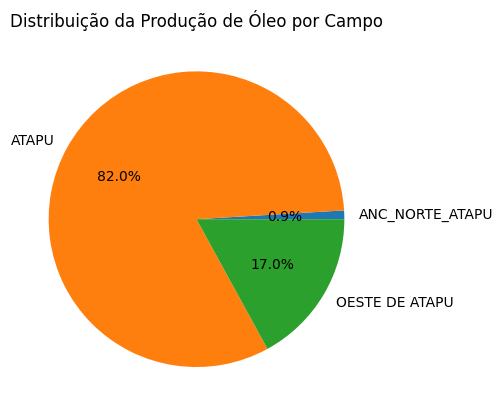

In [53]:
# agrupa os dados por campo e calcula a soma da produção de óleo em cada campo
grouped = df_jan_poco.groupby('Campo')['Produção de Óleo (m³)'].sum()

# cria uma figura
fig, ax = plt.subplots()

# cria um gráfico em círculo com as somas da produção de óleo
ax.pie(grouped.values, labels=grouped.index, autopct='%1.1f%%')

# adiciona um título ao gráfico
ax.set_title('Distribuição da Produção de Óleo por Campo')

# mostra o gráfico na tela
plt.show()

In [54]:
df_jan_poco.fillna(df_jan_poco.mean(), inplace=True)
df_jan_poco.head()

<ipython-input-54-72096b601e52>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_jan_poco.fillna(df_jan_poco.mean(), inplace=True)


,Ano,Mês/Ano,Estado,Bacia,Campo,Poço,Ambiente,Instalação,Produção de Óleo (m³),Produção de Condensado (m³),...,Produção de Gás Não Associado (Mm³),Produção de Água (m³),Injeção de Gás (Mm³),Injeção de Água para Recuperação Secundária (m³),Injeção de Água para Descarte (m³),Injeção de Gás Carbônico (Mm³),Injeção de Nitrogênio (Mm³),Injeção de Vapor de Água (t),Injeção de Polímeros (m³),Injeção de Outros Fluidos (m³)
1100,2022,01/2022,Rio de Janeiro,Santos,ANC_NORTE_ATAPU,7-ATP-6-RJS,Mar,Petrobras 70,2450.0,22942.0,...,530.0,85836.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1191,2022,01/2022,Rio de Janeiro,Santos,ATAPU,7-ATP-6-RJS,Mar,Petrobras 70,211539.0,96441.0,...,45831.0,57095.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1279,2022,01/2022,Rio de Janeiro,Santos,OESTE DE ATAPU,7-ATP-6-RJS,Mar,Petrobras 70,43928.0,75504.0,...,9517.0,46287.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df_jan = df_jan.drop(['Ano', 'Mês/Ano', 'Estado', 'Bacia', 'Campo', 'Poço', 'Ambiente','Instalação','Produção de Gás Associado (Mm³)', 'Injeção de Gás (Mm³)', 'Injeção de Água para Recuperação Secundária (m³)', 'Injeção de Água para Descarte (m³)', 'Injeção de Nitrogênio (Mm³)', 'Injeção de Vapor de Água (t)', 'Injeção de Polímeros (m³)', 'Injeção de Outros Fluidos (m³)', 'Injeção de Gás Carbônico (Mm³)'], axis=1)

In [56]:
df_jan_poco.fillna(df_jan_poco.mean(), inplace=True)
df_jan_poco.head()

<ipython-input-56-72096b601e52>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_jan_poco.fillna(df_jan_poco.mean(), inplace=True)


,Ano,Mês/Ano,Estado,Bacia,Campo,Poço,Ambiente,Instalação,Produção de Óleo (m³),Produção de Condensado (m³),...,Produção de Gás Não Associado (Mm³),Produção de Água (m³),Injeção de Gás (Mm³),Injeção de Água para Recuperação Secundária (m³),Injeção de Água para Descarte (m³),Injeção de Gás Carbônico (Mm³),Injeção de Nitrogênio (Mm³),Injeção de Vapor de Água (t),Injeção de Polímeros (m³),Injeção de Outros Fluidos (m³)
1100,2022,01/2022,Rio de Janeiro,Santos,ANC_NORTE_ATAPU,7-ATP-6-RJS,Mar,Petrobras 70,2450.0,22942.0,...,530.0,85836.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1191,2022,01/2022,Rio de Janeiro,Santos,ATAPU,7-ATP-6-RJS,Mar,Petrobras 70,211539.0,96441.0,...,45831.0,57095.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1279,2022,01/2022,Rio de Janeiro,Santos,OESTE DE ATAPU,7-ATP-6-RJS,Mar,Petrobras 70,43928.0,75504.0,...,9517.0,46287.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


## **Dados para treinamento**

In [57]:
df_jan_poco = df_jan_poco.drop(['Ano', 'Mês/Ano', 'Estado', 'Bacia', 'Campo', 'Poço', 'Ambiente','Instalação','Produção de Gás Associado (Mm³)', 'Injeção de Gás (Mm³)', 'Injeção de Água para Recuperação Secundária (m³)', 'Injeção de Água para Descarte (m³)', 'Injeção de Nitrogênio (Mm³)', 'Injeção de Vapor de Água (t)', 'Injeção de Polímeros (m³)', 'Injeção de Outros Fluidos (m³)', 'Injeção de Gás Carbônico (Mm³)'], axis=1)
df_jan_poco.head()

,Produção de Óleo (m³),Produção de Condensado (m³),Produção de Gás Não Associado (Mm³),Produção de Água (m³)
1100,2450.0,22942.0,530.0,85836.0
1191,211539.0,96441.0,45831.0,57095.0
1279,43928.0,75504.0,9517.0,46287.0


## **Dados para teste**

In [58]:
df = pd.read_csv('https://raw.githubusercontent.com/keziacamposcs/PUC_PTI_ProducaoPetroleo/main/producaoMar2022.csv', delimiter=';', error_bad_lines=False, engine='python')
df_fev = df.loc[df['Mês/Ano'] == '02/2022']
df_fev.head()

<ipython-input-58-7c6abfaaf329>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('https://raw.githubusercontent.com/keziacamposcs/PUC_PTI_ProducaoPetroleo/main/producaoMar2022.csv', delimiter=';', error_bad_lines=False, engine='python')


,Ano,Mês/Ano,Estado,Bacia,Campo,Poço,Ambiente,Instalação,Produção de Óleo (m³),Produção de Condensado (m³),...,Produção de Gás Não Associado (Mm³),Produção de Água (m³),Injeção de Gás (Mm³),Injeção de Água para Recuperação Secundária (m³),Injeção de Água para Descarte (m³),Injeção de Gás Carbônico (Mm³),Injeção de Nitrogênio (Mm³),Injeção de Vapor de Água (t),Injeção de Polímeros (m³),Injeção de Outros Fluidos (m³)
1772,2022,02/2022,Alagoas,Alagoas,PARU,4-ALS-39-AL,Mar,Estação de Paru,0.0,243.0,...,0.0,2163.0,47713.0,5.0,1454.0,NaN,NaN,NaN,NaN,NaN
1773,2022,02/2022,Bahia,Camamu,MANATI,7-MNT-1-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,193.0,...,0.0,13132.0,62429.0,81.0,422.0,NaN,NaN,NaN,NaN,NaN
1774,2022,02/2022,Bahia,Camamu,MANATI,7-MNT-2-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,196.0,...,0.0,13123.0,35597.0,81.0,365.0,NaN,NaN,NaN,NaN,NaN
1775,2022,02/2022,Bahia,Camamu,MANATI,7-MNT-3-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,146.0,...,0.0,8814.0,26659.0,58.0,173.0,NaN,NaN,NaN,NaN,NaN
1776,2022,02/2022,Bahia,Camamu,MANATI,7-MNT-4-BAS,Mar,PLATAFORMA DE MANATI 1,0.0,204.0,...,0.0,13902.0,72434.0,93.0,146.0,NaN,NaN,NaN,NaN,NaN


In [59]:
# Defina o nome do poço que você deseja filtrar
nome_do_poco = '7-ATP-6-RJS'

# Use o método .loc para selecionar apenas as linhas do DataFrame que correspondem a esse poço
poco_filtrado = df_fev.loc[df_fev['Poço'] == nome_do_poco]

# Crie um novo DataFrame contendo apenas as informações do poço filtrado
df_fev_poco = pd.DataFrame({
    'Ano': poco_filtrado['Ano'],
    'Mês/Ano': poco_filtrado['Mês/Ano'],
    'Estado': poco_filtrado['Estado'],
    'Bacia': poco_filtrado['Bacia'],
    'Campo': poco_filtrado['Campo'],
    'Poço': poco_filtrado['Poço'],
    'Ambiente': poco_filtrado['Ambiente'],
    'Instalação': poco_filtrado['Instalação'],
    'Produção de Óleo (m³)': poco_filtrado['Produção de Óleo (m³)'],
    'Produção de Condensado (m³)': poco_filtrado['Produção de Condensado (m³)'],
    'Produção de Gás Associado (Mm³)': poco_filtrado['Produção de Gás Associado (Mm³)'],
    'Produção de Gás Não Associado (Mm³)': poco_filtrado['Produção de Gás Não Associado (Mm³)'],
    'Produção de Água (m³)': poco_filtrado['Produção de Água (m³)'],
    'Injeção de Gás (Mm³)': poco_filtrado['Injeção de Gás (Mm³)'],
    'Injeção de Água para Recuperação Secundária (m³)': poco_filtrado['Injeção de Água para Recuperação Secundária (m³)'],
    'Injeção de Água para Descarte (m³)': poco_filtrado['Injeção de Água para Descarte (m³)'],
    'Injeção de Gás Carbônico (Mm³)': poco_filtrado['Injeção de Gás Carbônico (Mm³)'],
    'Injeção de Nitrogênio (Mm³)': poco_filtrado['Injeção de Nitrogênio (Mm³)'],
    'Injeção de Vapor de Água (t)': poco_filtrado['Injeção de Vapor de Água (t)'],
    'Injeção de Polímeros (m³)': poco_filtrado['Injeção de Polímeros (m³)'],
    'Injeção de Outros Fluidos (m³)': poco_filtrado['Injeção de Outros Fluidos (m³)']
})

df_fev_poco.head()

,Ano,Mês/Ano,Estado,Bacia,Campo,Poço,Ambiente,Instalação,Produção de Óleo (m³),Produção de Condensado (m³),...,Produção de Gás Não Associado (Mm³),Produção de Água (m³),Injeção de Gás (Mm³),Injeção de Água para Recuperação Secundária (m³),Injeção de Água para Descarte (m³),Injeção de Gás Carbônico (Mm³),Injeção de Nitrogênio (Mm³),Injeção de Vapor de Água (t),Injeção de Polímeros (m³),Injeção de Outros Fluidos (m³)
2882,2022,02/2022,Rio de Janeiro,Santos,ANC_NORTE_ATAPU,7-ATP-6-RJS,Mar,Petrobras 70,1936.0,93648.0,...,449.0,93211.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2972,2022,02/2022,Rio de Janeiro,Santos,ATAPU,7-ATP-6-RJS,Mar,Petrobras 70,167224.0,95247.0,...,38844.0,82107.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3060,2022,02/2022,Rio de Janeiro,Santos,OESTE DE ATAPU,7-ATP-6-RJS,Mar,Petrobras 70,34726.0,22297.0,...,8066.0,58234.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
df_fev_poco = df_fev_poco.drop(['Ano', 'Mês/Ano', 'Estado', 'Bacia', 'Campo', 'Poço', 'Ambiente','Instalação','Produção de Gás Associado (Mm³)', 'Injeção de Gás (Mm³)', 'Injeção de Água para Recuperação Secundária (m³)', 'Injeção de Água para Descarte (m³)', 'Injeção de Nitrogênio (Mm³)', 'Injeção de Vapor de Água (t)', 'Injeção de Polímeros (m³)', 'Injeção de Outros Fluidos (m³)', 'Injeção de Gás Carbônico (Mm³)'], axis=1)
df_fev_poco.head()

,Produção de Óleo (m³),Produção de Condensado (m³),Produção de Gás Não Associado (Mm³),Produção de Água (m³)
2882,1936.0,93648.0,449.0,93211.0
2972,167224.0,95247.0,38844.0,82107.0
3060,34726.0,22297.0,8066.0,58234.0


## **Regressão Linear**




In [61]:
train_df_rl = df_fev_poco
train_df_rl.head()

,Produção de Óleo (m³),Produção de Condensado (m³),Produção de Gás Não Associado (Mm³),Produção de Água (m³)
2882,1936.0,93648.0,449.0,93211.0
2972,167224.0,95247.0,38844.0,82107.0
3060,34726.0,22297.0,8066.0,58234.0


In [62]:
test_df_rl = df_fev_poco
test_df_rl.head()

,Produção de Óleo (m³),Produção de Condensado (m³),Produção de Gás Não Associado (Mm³),Produção de Água (m³)
2882,1936.0,93648.0,449.0,93211.0
2972,167224.0,95247.0,38844.0,82107.0
3060,34726.0,22297.0,8066.0,58234.0


In [63]:
# Separando as variáveis independentes da variável dependente
x_train = train_df_rl.drop('Produção de Óleo (m³)', axis=1)
y_train = train_df_rl['Produção de Óleo (m³)']

In [64]:
# Separando as variáveis independentes da variável dependente
x_test = test_df_rl.drop('Produção de Óleo (m³)', axis=1)
y_test = test_df_rl['Produção de Óleo (m³)']

In [65]:
# Criando o modelo
model_rl = LinearRegression()
model_rl.fit(x_train, y_train)

LinearRegression()

In [66]:
# Fazendo a previsão
y_pred = model_rl.predict(x_test)

In [67]:
# Avalia o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R²: ', r2)

MSE:  2.064642808932357e-21
RMSE:  4.543834073700708e-11
R²:  1.0


## **Árvore de Decisão**

In [68]:
train_df_ad = df_jan_poco
train_df_ad.head()

,Produção de Óleo (m³),Produção de Condensado (m³),Produção de Gás Não Associado (Mm³),Produção de Água (m³)
1100,2450.0,22942.0,530.0,85836.0
1191,211539.0,96441.0,45831.0,57095.0
1279,43928.0,75504.0,9517.0,46287.0


In [69]:
test_df_ad = df_fev_poco
test_df_ad.head()

,Produção de Óleo (m³),Produção de Condensado (m³),Produção de Gás Não Associado (Mm³),Produção de Água (m³)
2882,1936.0,93648.0,449.0,93211.0
2972,167224.0,95247.0,38844.0,82107.0
3060,34726.0,22297.0,8066.0,58234.0


In [70]:
# Separando as variáveis independentes da variável dependente
x_train = train_df_ad.drop('Produção de Óleo (m³)', axis=1)
y_train = train_df_ad['Produção de Óleo (m³)']

In [71]:
# Separando as variáveis independentes da variável dependente
x_test = test_df_ad.drop('Produção de Óleo (m³)', axis=1)
y_test = test_df_ad['Produção de Óleo (m³)']

In [72]:
# Criando o modelo
model_ad = DecisionTreeRegressor(random_state=42)
model_ad.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [73]:
# Fazendo a previsão
y_pred = model_ad.predict(x_test)

In [74]:
# Avalia o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R²: ', r2)

MSE:  682920075.0
RMSE:  26132.739523440705
R²:  0.866242800871901


## **Random Forest**

In [75]:
train_df_rf = df_jan_poco
train_df_rf.head()

,Produção de Óleo (m³),Produção de Condensado (m³),Produção de Gás Não Associado (Mm³),Produção de Água (m³)
1100,2450.0,22942.0,530.0,85836.0
1191,211539.0,96441.0,45831.0,57095.0
1279,43928.0,75504.0,9517.0,46287.0


In [76]:
test_df_rf = df_fev_poco
test_df_rf.head()

,Produção de Óleo (m³),Produção de Condensado (m³),Produção de Gás Não Associado (Mm³),Produção de Água (m³)
2882,1936.0,93648.0,449.0,93211.0
2972,167224.0,95247.0,38844.0,82107.0
3060,34726.0,22297.0,8066.0,58234.0


In [77]:
# Separando as variáveis independentes da variável dependente
x_train = train_df_rf.drop('Produção de Óleo (m³)', axis=1)
y_train = train_df_rf['Produção de Óleo (m³)']

In [78]:
# Separando as variáveis independentes da variável dependente
x_test = test_df_rf.drop('Produção de Óleo (m³)', axis=1)
y_test = test_df_rf['Produção de Óleo (m³)']

In [79]:
# Criando o modelo
model_rf = DecisionTreeRegressor(random_state=42)
model_rf.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [80]:
# Fazendo a previsão
y_pred = model_rf.predict(x_test)

In [81]:
# Avalia o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R²: ', r2)

MSE:  682920075.0
RMSE:  26132.739523440705
R²:  0.866242800871901


## **Redes Neurais**

In [82]:
train_df_rn = df_jan_poco
train_df_rn.head()

,Produção de Óleo (m³),Produção de Condensado (m³),Produção de Gás Não Associado (Mm³),Produção de Água (m³)
1100,2450.0,22942.0,530.0,85836.0
1191,211539.0,96441.0,45831.0,57095.0
1279,43928.0,75504.0,9517.0,46287.0


In [83]:
test_df_rn = df_fev_poco
test_df_rn.head()

,Produção de Óleo (m³),Produção de Condensado (m³),Produção de Gás Não Associado (Mm³),Produção de Água (m³)
2882,1936.0,93648.0,449.0,93211.0
2972,167224.0,95247.0,38844.0,82107.0
3060,34726.0,22297.0,8066.0,58234.0


In [84]:
# Separando as variáveis independentes da variável dependente
x_train = train_df_rn.drop('Produção de Óleo (m³)', axis=1)
y_train = train_df_rn['Produção de Óleo (m³)']

In [85]:
# Separando as variáveis independentes da variável dependente
x_test = test_df_rn.drop('Produção de Óleo (m³)', axis=1)
y_test = test_df_rn['Produção de Óleo (m³)']

In [86]:
#Criando modelo de Redes Neurais
mlp = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', max_iter=1000)

In [87]:
mlp.fit(x_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000)

In [88]:
# Fazendo a previsão
y_pred = mlp.predict(x_test)
print(y_pred)

[ 22594.84291084 174956.66449327  25189.76320019]


In [89]:
# Avalia o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R²: ', r2)

MSE:  192507234.2941285
RMSE:  13874.697628926135
R²:  0.9622953996906894
